# Iris 데이터를 활용한 랜덤포레스트 & 부스팅

## 1. Iris 데이터 및 패키지 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

## 2. train set, test set 만들기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, 
                                                    test_size=0.25, stratify=iris.target, random_state=123456)

## 3. XGboost 모델 만들기

In [25]:
xgb = xgboost.XGBClassifier(n_estimators= 1000)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## 4. test set에 적합하기

In [26]:
predicted_xgb = xgb.predict(X_test) # xgb 모델에 X_test를 넣고 그 예측값을 predicted에 저장
accuracy_xgb = accuracy_score(y_test, predicted_xgb) # 실제 데이터와 예측값이 일치하는 비율

print(f'Mean accuracy score: {accuracy_xgb:.3}')

Mean accuracy score: 0.947


C:\Users\dongkeon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 5. confusion matrix로 분류 결과 시각화

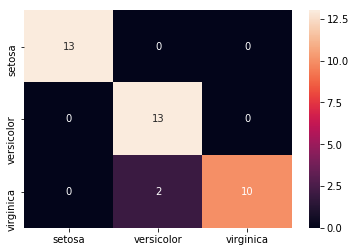

In [27]:
cm_xgb = pd.DataFrame(confusion_matrix(y_test, predicted_xgb), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm_xgb, annot=True) 